# 第四章 Numpy基础：数组和矢量计算
## Numpy的 ndarray:一种多维数组对象
**创建 Ndarray**

In [1]:
import numpy as np
data1 = [6,7,8,7.6]
arr1 = np.array(data1)
arr1

array([ 6. ,  7. ,  8. ,  7.6])

嵌套序列将会被转换为一个多维数组

In [2]:
import numpy as np
data2 = [[1,2],[3,4]]
arr2 = np.array(data2)
arr2

array([[1, 2],
       [3, 4]])

In [5]:
arr2.dtype

dtype('int32')

还有 ones zeros empty 可以创建新数组

In [8]:
import numpy as np
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**数组和标量之间的运算**

可以不用编写循环就可以对数据执行批量运算，即矢量化

In [14]:
import numpy as np
arr = np.array([[1,2,3],[4,5,6]])

print(arr*arr)

print(arr ** 0.5)

[[ 1  4  9]
 [16 25 36]]
[[ 1.          1.41421356  1.73205081]
 [ 2.          2.23606798  2.44948974]]


和列表的区别在于，数组切片是原始数组的视图。

也就是说，数据不会被复制，对于任何修改都会直接反映到原数组上。

In [18]:
import numpy as np
arr = np.array([0,1,2,3,4,5,6,7,8,9])
arr_slice = arr[5:8]
arr_slice
arr_slice[:] = 64
arr_slice

array([64, 64, 64])

所以如果需要得到的是切片的一个副本而不是视图，就需要显式地进行复制操作，例如 arr[5:8].copy

**布尔型索引**

一种常见的对于数组的索引是利用布尔值

In [20]:
import numpy as np
data = np.array([[-0.2,3],[2.34,-0.23]])
data[data<0] = 0
data

array([[ 0.  ,  3.  ],
       [ 2.34,  0.  ]])

** Fancy indexing**

利用整数数组进行索引

In [21]:
import numpy as mp
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [22]:
arr[[4,3,0,6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [24]:
arr = np.arange(32).reshape((8,4))
print(arr)
arr[[1,5,7,2],[0,3,1,2]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


array([ 4, 23, 29, 10])

In [26]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [27]:
arr[np.ix_([1,5,7,2],[0,3,1,2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

花式索引和切片不一样，总是将宿舍复制到新的数组中。

**数组转置和轴对换**

转置也不会进行对于源数据的复制,在进行矩阵内积计算中常常用到

In [31]:
import numpy as np
arr = np.arange(15).reshape((3,5))
print(arr)
print(arr.T)
print(arr.transpose())
arr = np.random.randn(6,3)
print(arr)
np.dot(arr.T,arr)


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
[[ 0.71339914  0.27020839 -0.84892226]
 [-0.72563928  0.18723244  0.10194539]
 [-3.23360187  0.6528107  -0.38816385]
 [-0.20556261  1.03576152  0.71852479]
 [-0.65932081 -2.75839918  0.53026324]
 [ 1.70380211  1.53550503  0.72717989]]


array([[ 14.87157328,   2.16792616,   1.31722658],
       [  2.16792616,  11.57357402,  -0.06556491],
       [  1.31722658,  -0.06556491,   2.20798061]])

对于高维数组，需要给 transpose 传递一个用轴编号组成的元祖才能对于这些轴进行转置。

**通用函数：快速的元素级数组函数**
通用函数是对于 ndarray 中的数据执行元素级运算的函数，可以将其视为简单函数的矢量化包装器。

In [32]:
import numpy as np
arr = np.arange(10)
print(np.sqrt(arr))
print(np.exp(arr))

x = np.random.randn(8)
print(x)
y = mp.random.randn(8)
print(y)
print(np.maximum(x,y))

[ 0.          1.          1.41421356  1.73205081  2.          2.23606798
  2.44948974  2.64575131  2.82842712  3.        ]
[  1.00000000e+00   2.71828183e+00   7.38905610e+00   2.00855369e+01
   5.45981500e+01   1.48413159e+02   4.03428793e+02   1.09663316e+03
   2.98095799e+03   8.10308393e+03]
[-1.56586268  0.96475604 -0.42009365  1.15988951  0.35847242  0.87285986
 -0.41010391 -0.71111478]
[ 0.71123516 -0.40064383 -0.16343943  0.19174829 -0.71690498  0.23240237
  0.7232248  -0.36175129]
[ 0.71123516  0.96475604 -0.16343943  1.15988951  0.35847242  0.87285986
  0.7232248  -0.36175129]


**利用数组进行数据处理**

利用数组可以将很多种数据处理任务简化为数组表达式（否则需要编写循环）。

利用数组表达式代替循环的做法，称为矢量化。
这一方法一般比等价的方式快上一两个数量级，所以在数值计算中很重要。

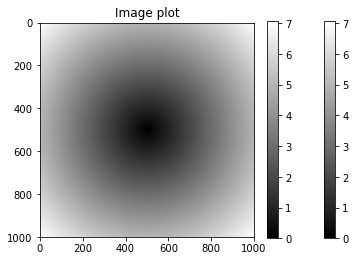

In [34]:
import numpy as np
import matplotlib.pyplot as plt
points = np.arange(-5,5,0.01)
xs,ys = np.meshgrid(points,points)

z = np.sqrt(xs**2 + ys**2)

plt.imshow(z,cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot")
plt.show()

**将条件逻辑表述为数组运算**

numpy.where 函数

还可以用于根据一个数组产生另外一个数组

In [39]:
import numpy as np
xarr = np.array([1.1,1.2,1.3])
yarr = np.array([2.1,2.2,2.3])
cond = np.array([True,False,True])

result1 = np.where(cond,xarr,yarr)
print(result1)

[ 1.1  2.2  1.3]


In [41]:
arr = np.random.randn(4,4)
print(arr)

arr1 = np.where(arr>0,2,-2)
arr2 = np.where(arr>0,2,arr)

print(arr1)
print(arr2)

[[-0.54492384 -0.16086691  0.45438412 -0.52546054]
 [-0.23297619 -1.26250271  1.48155412  0.15998361]
 [ 0.79045595 -0.0456819  -0.05990048  0.37642498]
 [ 0.05255322 -0.28002741  1.46000742  0.9935079 ]]
[[-2 -2  2 -2]
 [-2 -2  2  2]
 [ 2 -2 -2  2]
 [ 2 -2  2  2]]
[[-0.54492384 -0.16086691  2.         -0.52546054]
 [-0.23297619 -1.26250271  2.          2.        ]
 [ 2.         -0.0456819  -0.05990048  2.        ]
 [ 2.         -0.28002741  2.          2.        ]]


**数学和统计方法**

数学函数可以对于某个轴向的数据进行统计计算

In [45]:
import numpy as np
arr = np.random.randn(5,4)

print(arr)

print(arr.sum(0))

[[ 0.2607086  -0.63260576  1.3168348  -1.90210283]
 [-2.20267064  0.4819067  -1.6086633  -0.04358638]
 [-0.51856974 -0.60648198  1.02205771 -0.05789066]
 [-0.71636218  0.68934194  0.71798269  1.81125615]
 [ 0.51337859 -0.46466076  0.63607506 -1.32009272]]
[ 0.2607086  -0.63260576  1.3168348  -1.90210283]
[-2.66351537 -0.53249986  2.08428696 -1.51241644]


**用于布尔型数组的方法**

布尔值在上面的方法中会被强制转换俄日 1(True) 和 0(False) 常常可以使用 sum 进行对于 True 的计数

另外还有 any 和 all 方法

In [46]:
import numpy as np
arr = np.random.randn(100)

(arr>0).sum()

41

In [47]:
bools = np.array([False,True,False])
bools.any() #检查数组中是否存在 True
bools.all() #检查数组中是否都是True

False

**排序**

sort 方法

In [56]:
import numpy as np
arr1 = np.array([[1,-1],[3,-6]])
arr1.sort(0)
arr1

array([[ 1, -6],
       [ 3, -1]])

**唯一化**

np.unique 可以找出数值中的唯一值并且返回已经排序的结果

还有别的集合函数

In [57]:
import numpy as np
ints = np.array([3,3,3,2,2,3,-2,-2,1,4,4])
np.unique(ints)

array([-2,  1,  2,  3,  4])

**用于数组的文件输入和输出**

+ 将数据以二进制格式保存

np.save 和 np.load 

默认情况下，数组以未压缩的原始二进制格式保存在 ,npy 文件中

np.savez 则可以把多个数组保存到一个压缩文件中

+ 存取文本文件

pandas 中的 read_csv 和 read_table

另外还有 np.loadtxt 和 np.getfromtxt 将数据加载到 Numpy 数组中

存取则是 np.savetxt

**线性代数**


In [59]:
from numpy.linalg import inv,qr
import numpy as np
X = np.random.randn(3,3)

mat = X.T.dot(X)
mat

array([[ 3.21642582,  1.07775503,  1.22414586],
       [ 1.07775503,  1.33550912,  1.48689111],
       [ 1.22414586,  1.48689111,  1.66831317]])

In [61]:
inv(mat)

array([[  0.43457189,   0.55927704,  -0.81733062],
       [  0.55927704,  97.70180388, -87.48751888],
       [ -0.81733062, -87.48751888,  79.17275248]])

In [60]:
mat.dot(inv(mat))

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -4.44089210e-16,   1.00000000e+00,   1.42108547e-14],
       [ -2.22044605e-16,   2.84217094e-14,   1.00000000e+00]])

In [62]:
q,r = qr(mat)
r

array([[-3.6063117 , -1.86507517, -2.10246313],
       [ 0.        , -1.29517579, -1.43952216],
       [ 0.        ,  0.        ,  0.00847486]])

**随机数生成**

numpy.random 模块比 python 内置的 random模块强大